In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def input_pipeline(path: str) -> pd.DataFrame:

    column_types = {"ID": str,
                    "Customer_ID": str,
                    "Month": str,
                    "Name": str,
                    "Age": np.int16,
                    "SSN": str,
                    "Occupation": str,
                    "AnnualIncome": np.float32,
                    "Monthly_Inhand_Salary": np.float32,
                    "Num_Bank_Accounts": np.int16,
                    "Num_Credit_Card": np.int16,
                    "Interest_Rate": np.int16,
                    "Num_of_Loan": np.int16,
                    "Type_of_Loan": str,
                    "Delay_from_due_date": np.int16,
                    "Num_of_Delayed_Payment": np.int16,
                    "Changed_Credit_Limit": np.float32,
                    "Num_Credit_Inquiries": np.float32,
                    "Credit_Mix": str,
                    "Outstanding_Debt": np.float32,
                    "Credit_Utilization_Ratio": np.float32,
                    "Credit_History_Age": str,
                    "Payment_of_Min_Amount": str,
                    "Total_EMI_per_month": np.float32,
                    "Amount_invested_monthly": np.float32,
                    "Payment_Behaviour": str,
                    "Monthly_Balance": np.float32,
                    "Credit_Score": str}
    
    ofJedi = pd.read_csv(filepath_or_buffer=path, dtype=column_types, on_bad_lines="skip")
    ofJedi.drop(columns=["ID", "Customer_ID", "Name", "SSN", "Month", "Occupation"], inplace=True)

    return ofJedi

In [3]:
def count_null_rows(df):
    for col in df.columns:
        na_sum = df[col].isna().sum()
        sum = len(df)
        
        if na_sum > 0:
            print("{0}:\t{1}".format(col, (na_sum/sum)))

In [4]:
def credit_history_age_clean(df):
    df.dropna(subset=["Credit_History_Age"], inplace=True)
    df["Credit_History_Age"] = df["Credit_History_Age"].str.slice(start=0, stop=2).astype(dtype=int)

In [5]:
def check_objects_per(df: pd.DataFrame) -> None:
    count_rows = len(df)
    for col in df.columns:
        if df[col].dtype == object:
            print(col)
            print(df[col].value_counts()/count_rows)
            print("\n")

In [39]:
def age_cleaner(df: pd.DataFrame, indexes: np.array) -> pd.DataFrame:
    pass

In [37]:
def age_analysis(x: pd.Series) -> np.array:
    print(x.head())
    print("Stardard Deviation:\t{0}\nMean:\t{1}\nVariance:\t{2}\nMaximum:\t{3}\nMinimum:\t{4}".format(x.std(), x.mean(), x.var(), x.max(), x.min()))

    print(x.describe())

    print("\nLength over 80:\t{0}".format(len(x[x > 80])))
    print("\nLength under 18:\t{0}".format(len(x[x < 18])))

    print("\nPercentage over 80:\t{0}".format(len(x[x > 80])/len(x)))
    print("\nPercentage under 18:\t{0}".format(len(x[x < 18])/len(x)))

    sns.boxplot(x=x)
    sns.displot(data=x, kind="kde")
    plt.show()

In [7]:
def generate_boxplot(df: pd.DataFrame) -> None:
    for col in df.columns:
        if df[col] != object:
            print(sns.boxplot(data=df[col]))

In [8]:
train_df = input_pipeline(path="train.csv")
train_df

,Age,AnnualIncome,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Numof_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,19114.119141,1824.843384,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,...,_,809.979980,26.822620,22 Years and 1 Months,No,49.574947,80.415298,High_spent_Small_value_payments,312.494080,Good
1,23,19114.119141,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,...,Good,809.979980,31.944960,NaN,No,49.574947,118.280220,Low_spent_Large_value_payments,284.629150,Good
2,-500,19114.119141,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,...,Good,809.979980,28.609352,22 Years and 3 Months,No,49.574947,81.699524,Low_spent_Medium_value_payments,331.209869,Good
3,23,19114.119141,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,...,Good,809.979980,31.377861,22 Years and 4 Months,No,49.574947,199.458069,Low_spent_Small_value_payments,223.451309,Good
4,23,19114.119141,1824.843384,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,...,Good,809.979980,24.797346,22 Years and 5 Months,No,49.574947,41.420155,High_spent_Medium_value_payments,341.489227,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,39628.988281,3359.415771,4,6,7,2,"Auto Loan, and Student Loan",23,7.0,...,_,502.380005,34.663570,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,479.866241,Poor
99996,25,39628.988281,3359.415771,4,6,7,2,"Auto Loan, and Student Loan",18,7.0,...,_,502.380005,40.565632,31 Years and 7 Months,No,35.104023,54.185951,High_spent_Medium_value_payments,496.651611,Poor
99997,25,39628.988281,3359.415771,4,6,5729,2,"Auto Loan, and Student Loan",27,6.0,...,Good,502.380005,41.255524,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,516.809082,Poor
99998,25,39628.988281,3359.415771,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,...,Good,502.380005,33.638206,31 Years and 9 Months,No,35.104023,251.672577,Low_spent_Large_value_payments,319.164978,Standard


In [9]:
for col in train_df.columns:
    print("{0}:\t{1}".format(col, train_df[col].dtype))

Age:	int16
AnnualIncome:	float32
Monthly_Inhand_Salary:	float32
Num_Bank_Accounts:	int16
Num_Credit_Card:	int16
Interest_Rate:	int16
Num_of_Loan:	int16
Type_of_Loan:	object
Delay_from_due_date:	int16
Numof_Delayed_Payment:	float64
Changed_Credit_Limit:	float32
Num_Credit_Inquiries:	float32
Credit_Mix:	object
Outstanding_Debt:	float32
Credit_Utilization_Ratio:	float32
Credit_History_Age:	object
Payment_of_Min_Amount:	object
Total_EMI_per_month:	float32
Amount_invested_monthly:	float32
Payment_Behaviour:	object
Monthly_Balance:	float32
Credit_Score:	object


In [10]:
for col in train_df.columns:
    print("{0}:\t{1}".format(col, train_df[col].isna().sum()))

Age:	0
AnnualIncome:	0
Monthly_Inhand_Salary:	15002
Num_Bank_Accounts:	0
Num_Credit_Card:	0
Interest_Rate:	0
Num_of_Loan:	0
Type_of_Loan:	11408
Delay_from_due_date:	0
Numof_Delayed_Payment:	7002
Changed_Credit_Limit:	2091
Num_Credit_Inquiries:	1965
Credit_Mix:	0
Outstanding_Debt:	0
Credit_Utilization_Ratio:	0
Credit_History_Age:	9030
Payment_of_Min_Amount:	0
Total_EMI_per_month:	0
Amount_invested_monthly:	4479
Payment_Behaviour:	0
Monthly_Balance:	1200
Credit_Score:	0


In [11]:
len(train_df)

100000

In [12]:
for col in train_df.columns:
    na_sum = train_df[col].isna().sum()
    sum = len(train_df)

    if na_sum > 0 and train_df[col].dtype==object:
        print("{0}:\t{1}".format(col, (na_sum/sum)))

Type_of_Loan:	0.11408
Credit_History_Age:	0.0903


In [13]:
train_df[train_df["Type_of_Loan"].isna() & train_df["Credit_History_Age"].isna()]

,Age,AnnualIncome,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Numof_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
40,31,73928.460938,NaN,4,1288,8,0,NaN,12,10.0,...,Good,548.200012,39.962685,NaN,No,15015.0,98.674408,High_spent_Large_value_payments,740.196106,Good
42,31,73928.460938,5988.705078,4,5,8,0,NaN,8,7.0,...,Good,548.200012,40.712185,NaN,No,0.0,150.059738,High_spent_Medium_value_payments,698.810791,Good
45,31,73928.460938,5988.705078,4,5,8,0,NaN,7,7.0,...,Good,548.200012,35.275436,NaN,No,15515.0,235.790329,Low_spent_Large_value_payments,633.080200,Good
131,20,92047.078125,7591.589844,6,7,16,0,NaN,16,11.0,...,Standard,1296.640015,42.944683,NaN,Yes,0.0,120.907555,High_spent_Large_value_payments,878.251465,Poor
133,20,92047.078125,7591.589844,6,7,16,0,NaN,16,13.0,...,Standard,1296.640015,28.776937,NaN,Yes,0.0,266.585022,Low_spent_Small_value_payments,782.573975,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99809,19,39977.210938,NaN,4,7,11,0,NaN,13,13.0,...,Good,832.090027,32.676250,NaN,No,0.0,72.525177,High_spent_Medium_value_payments,535.818237,Good
99880,31,64511.339844,5440.944824,7,3,15,0,NaN,7,10.0,...,Standard,330.600006,33.937035,NaN,Yes,0.0,392.173096,Low_spent_Large_value_payments,421.921417,Standard
99910,39,87695.343750,NaN,2,7,7,0,NaN,5,NaN,...,Good,361.679993,42.042233,NaN,No,0.0,160.701965,High_spent_Small_value_payments,833.092529,Standard
99937,-500,22620.789062,1722.065796,7,3,9,0,NaN,25,NaN,...,Standard,642.460022,31.841873,NaN,No,0.0,105.076294,Low_spent_Large_value_payments,337.130280,Standard


Type_of_Loan is too sparse, and too many nan values

In [14]:
train_df["Type_of_Loan"].value_counts()

Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                 8
Payday Loan, Mortgage Loan,

In [15]:
train_df.drop(columns=["Type_of_Loan"], inplace=True)
train_df

,Age,AnnualIncome,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Numof_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,19114.119141,1824.843384,3,4,3,4,3,7.0,11.27,...,_,809.979980,26.822620,22 Years and 1 Months,No,49.574947,80.415298,High_spent_Small_value_payments,312.494080,Good
1,23,19114.119141,NaN,3,4,3,4,-1,NaN,11.27,...,Good,809.979980,31.944960,NaN,No,49.574947,118.280220,Low_spent_Large_value_payments,284.629150,Good
2,-500,19114.119141,NaN,3,4,3,4,3,7.0,NaN,...,Good,809.979980,28.609352,22 Years and 3 Months,No,49.574947,81.699524,Low_spent_Medium_value_payments,331.209869,Good
3,23,19114.119141,NaN,3,4,3,4,5,4.0,6.27,...,Good,809.979980,31.377861,22 Years and 4 Months,No,49.574947,199.458069,Low_spent_Small_value_payments,223.451309,Good
4,23,19114.119141,1824.843384,3,4,3,4,6,NaN,11.27,...,Good,809.979980,24.797346,22 Years and 5 Months,No,49.574947,41.420155,High_spent_Medium_value_payments,341.489227,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,39628.988281,3359.415771,4,6,7,2,23,7.0,11.50,...,_,502.380005,34.663570,31 Years and 6 Months,No,35.104023,60.971333,High_spent_Large_value_payments,479.866241,Poor
99996,25,39628.988281,3359.415771,4,6,7,2,18,7.0,11.50,...,_,502.380005,40.565632,31 Years and 7 Months,No,35.104023,54.185951,High_spent_Medium_value_payments,496.651611,Poor
99997,25,39628.988281,3359.415771,4,6,5729,2,27,6.0,11.50,...,Good,502.380005,41.255524,31 Years and 8 Months,No,35.104023,24.028477,High_spent_Large_value_payments,516.809082,Poor
99998,25,39628.988281,3359.415771,4,6,7,2,20,NaN,11.50,...,Good,502.380005,33.638206,31 Years and 9 Months,No,35.104023,251.672577,Low_spent_Large_value_payments,319.164978,Standard


In [16]:
count_null_rows(df=train_df)

Monthly_Inhand_Salary:	0.15002
Numof_Delayed_Payment:	0.07002
Changed_Credit_Limit:	0.02091
Num_Credit_Inquiries:	0.01965
Credit_History_Age:	0.0903
Amount_invested_monthly:	0.04479
Monthly_Balance:	0.012


In [17]:
train_df["Credit_History_Age"].value_counts()

15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: Credit_History_Age, Length: 404, dtype: int64

In [18]:
credit_history_age_clean(train_df)
train_df

,Age,AnnualIncome,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Numof_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,19114.119141,1824.843384,3,4,3,4,3,7.0,11.27,...,_,809.979980,26.822620,22,No,49.574947,80.415298,High_spent_Small_value_payments,312.494080,Good
2,-500,19114.119141,NaN,3,4,3,4,3,7.0,NaN,...,Good,809.979980,28.609352,22,No,49.574947,81.699524,Low_spent_Medium_value_payments,331.209869,Good
3,23,19114.119141,NaN,3,4,3,4,5,4.0,6.27,...,Good,809.979980,31.377861,22,No,49.574947,199.458069,Low_spent_Small_value_payments,223.451309,Good
4,23,19114.119141,1824.843384,3,4,3,4,6,NaN,11.27,...,Good,809.979980,24.797346,22,No,49.574947,41.420155,High_spent_Medium_value_payments,341.489227,Good
5,23,19114.119141,NaN,3,4,3,4,8,4.0,9.27,...,Good,809.979980,27.262259,22,No,49.574947,62.430172,!@9#%8,340.479218,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,39628.988281,3359.415771,4,6,7,2,23,7.0,11.50,...,_,502.380005,34.663570,31,No,35.104023,60.971333,High_spent_Large_value_payments,479.866241,Poor
99996,25,39628.988281,3359.415771,4,6,7,2,18,7.0,11.50,...,_,502.380005,40.565632,31,No,35.104023,54.185951,High_spent_Medium_value_payments,496.651611,Poor
99997,25,39628.988281,3359.415771,4,6,5729,2,27,6.0,11.50,...,Good,502.380005,41.255524,31,No,35.104023,24.028477,High_spent_Large_value_payments,516.809082,Poor
99998,25,39628.988281,3359.415771,4,6,7,2,20,NaN,11.50,...,Good,502.380005,33.638206,31,No,35.104023,251.672577,Low_spent_Large_value_payments,319.164978,Standard


In [19]:
count_null_rows(train_df)

Monthly_Inhand_Salary:	0.15023634165109376
Numof_Delayed_Payment:	0.06983620973947455
Changed_Credit_Limit:	0.020875013740793667
Num_Credit_Inquiries:	0.01964383862811916
Amount_invested_monthly:	0.04489392107288117
Monthly_Balance:	0.011817082554688359


In [20]:
train_df.dropna(inplace=True)
train_df

,Age,AnnualIncome,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Numof_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,19114.119141,1824.843384,3,4,3,4,3,7.0,11.27,...,_,809.979980,26.822620,22,No,49.574947,80.415298,High_spent_Small_value_payments,312.494080,Good
6,23,19114.119141,1824.843384,3,4,3,4,3,8.0,11.27,...,Good,809.979980,22.537594,22,No,49.574947,178.344070,Low_spent_Small_value_payments,244.565323,Good
8,28,34847.839844,3037.986572,2,4,6,1,3,4.0,5.42,...,Good,605.030029,24.464031,26,No,18.816216,104.291824,Low_spent_Small_value_payments,470.690613,Standard
9,28,34847.839844,3037.986572,2,4,6,1,7,1.0,7.42,...,Good,605.030029,38.550850,26,No,18.816216,40.391239,High_spent_Large_value_payments,484.591217,Good
10,28,34847.839844,3037.986572,2,1385,6,1,3,-1.0,5.42,...,_,605.030029,33.224949,26,No,18.816216,58.515976,High_spent_Large_value_payments,466.466461,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25,39628.988281,3359.415771,4,6,7,2,20,6.0,9.50,...,_,502.380005,39.323570,31,No,35.104023,140.581406,High_spent_Medium_value_payments,410.256165,Poor
99995,25,39628.988281,3359.415771,4,6,7,2,23,7.0,11.50,...,_,502.380005,34.663570,31,No,35.104023,60.971333,High_spent_Large_value_payments,479.866241,Poor
99996,25,39628.988281,3359.415771,4,6,7,2,18,7.0,11.50,...,_,502.380005,40.565632,31,No,35.104023,54.185951,High_spent_Medium_value_payments,496.651611,Poor
99997,25,39628.988281,3359.415771,4,6,5729,2,27,6.0,11.50,...,Good,502.380005,41.255524,31,No,35.104023,24.028477,High_spent_Large_value_payments,516.809082,Poor


In [21]:
for col in train_df.columns:
    if train_df[col].dtype == object:
        print(col)
        print(train_df[col].value_counts())
        print("\n")

Credit_Mix
Standard    23853
Good        15777
_           13213
Bad         12300
Name: Credit_Mix, dtype: int64


Payment_of_Min_Amount
Yes    34201
No     23195
NM      7747
Name: Payment_of_Min_Amount, dtype: int64


Payment_Behaviour
Low_spent_Small_value_payments      16342
High_spent_Medium_value_payments    11596
High_spent_Large_value_payments      9077
Low_spent_Medium_value_payments      8981
High_spent_Small_value_payments      7495
Low_spent_Large_value_payments       6789
!@9#%8                               4863
Name: Payment_Behaviour, dtype: int64


Credit_Score
Standard    34771
Poor        18859
Good        11513
Name: Credit_Score, dtype: int64




In [22]:
train_df[col].value_counts()

Standard    34771
Poor        18859
Good        11513
Name: Credit_Score, dtype: int64

In [23]:
train_df["Credit_Score"].value_counts()/2

Standard    17385.5
Poor         9429.5
Good         5756.5
Name: Credit_Score, dtype: float64

In [24]:
check_objects_per(df=train_df)

Credit_Mix
Standard    0.366164
Good        0.242190
_           0.202831
Bad         0.188815
Name: Credit_Mix, dtype: float64


Payment_of_Min_Amount
Yes    0.525014
No     0.356063
NM     0.118923
Name: Payment_of_Min_Amount, dtype: float64


Payment_Behaviour
Low_spent_Small_value_payments      0.250863
High_spent_Medium_value_payments    0.178008
High_spent_Large_value_payments     0.139340
Low_spent_Medium_value_payments     0.137866
High_spent_Small_value_payments     0.115055
Low_spent_Large_value_payments      0.104217
!@9#%8                              0.074651
Name: Payment_Behaviour, dtype: float64


Credit_Score
Standard    0.533764
Poor        0.289502
Good        0.176734
Name: Credit_Score, dtype: float64




In [25]:
train_df.drop(index=train_df[train_df.Payment_Behaviour == "!@9#%8"].index, inplace=True)

In [26]:
train_df.drop(index=train_df[train_df.Credit_Mix == "_"].index, inplace=True)

In [27]:
check_objects_per(df=train_df)

Credit_Mix
Standard    0.459412
Good        0.304277
Bad         0.236311
Name: Credit_Mix, dtype: float64


Payment_of_Min_Amount
Yes    0.523800
No     0.357681
NM     0.118520
Name: Payment_of_Min_Amount, dtype: float64


Payment_Behaviour
Low_spent_Small_value_payments      0.270097
High_spent_Medium_value_payments    0.193684
High_spent_Large_value_payments     0.151286
Low_spent_Medium_value_payments     0.148831
High_spent_Small_value_payments     0.123096
Low_spent_Large_value_payments      0.113007
Name: Payment_Behaviour, dtype: float64


Credit_Score
Standard    0.534243
Poor        0.289257
Good        0.176500
Name: Credit_Score, dtype: float64




In [28]:
len(train_df)

48068

In [29]:
train_df.columns

Index(['Age', 'AnnualIncome', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Numof_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [30]:
train_df.reset_index(drop=True, inplace=True)
train_df

,Age,AnnualIncome,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Numof_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,19114.119141,1824.843384,3,4,3,4,3,8.0,11.270000,...,Good,809.979980,22.537594,22,No,49.574947,178.344070,Low_spent_Small_value_payments,244.565323,Good
1,28,34847.839844,3037.986572,2,4,6,1,3,4.0,5.420000,...,Good,605.030029,24.464031,26,No,18.816216,104.291824,Low_spent_Small_value_payments,470.690613,Standard
2,28,34847.839844,3037.986572,2,4,6,1,7,1.0,7.420000,...,Good,605.030029,38.550850,26,No,18.816216,40.391239,High_spent_Large_value_payments,484.591217,Good
3,28,34847.839844,3037.986572,2,4,6,1,3,1.0,6.420000,...,Good,605.030029,34.977894,26,No,18.816216,130.115417,Low_spent_Small_value_payments,444.867035,Good
4,28,34847.839844,3037.986572,2,4,6,1,3,0.0,5.420000,...,Good,605.030029,33.381012,27,No,18.816216,43.477192,High_spent_Large_value_payments,481.505249,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48063,28,20002.880859,1929.906616,10,8,29,5,35,26.0,18.309999,...,Bad,3571.699951,22.895966,5,Yes,60.964771,43.370670,High_spent_Large_value_payments,328.655212,Poor
48064,28,20002.880859,1929.906616,10,8,29,5,33,25.0,23.309999,...,Bad,3571.699951,39.772606,5,Yes,12112.000000,148.275238,Low_spent_Small_value_payments,273.750671,Poor
48065,28,20002.880859,1929.906616,10,8,29,5,33,25.0,18.309999,...,Bad,3571.699951,24.713861,5,Yes,60.964771,76.282791,Low_spent_Small_value_payments,345.743103,Poor
48066,29,20002.880859,1929.906616,10,8,29,5,33,25.0,18.309999,...,Bad,3571.699951,37.140785,6,Yes,60.964771,34.662907,High_spent_Large_value_payments,337.362976,Standard


0    23
1    28
2    28
3    28
4    28
Name: Age, dtype: int16
Stardard Deviation:	695.430173952318
Mean:	112.86286094699176
Variance:	483623.12684335123
Maximum:	8698
Minimum:	-500
count    48068.000000
mean       112.862861
std        695.430174
min       -500.000000
25%         24.000000
50%         33.000000
75%         42.000000
max       8698.000000
Name: Age, dtype: float64

Length over 80:	925

Length under 18:	3166

Percentage over 80:	0.01924357160689024

Percentage under 18:	0.06586502454855621


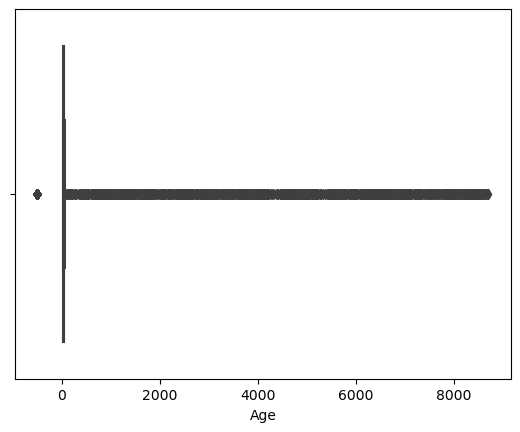

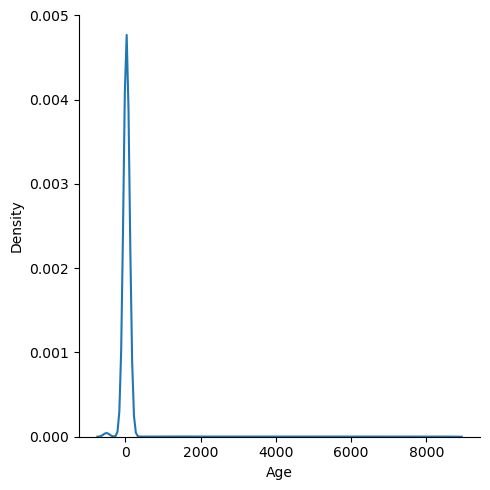

In [38]:
age_analysis(train_df["Age"])

C:\Users\gustavo.o.gois\AppData\Local\Temp\ipykernel_9424\2213743111.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = train_df.corr()


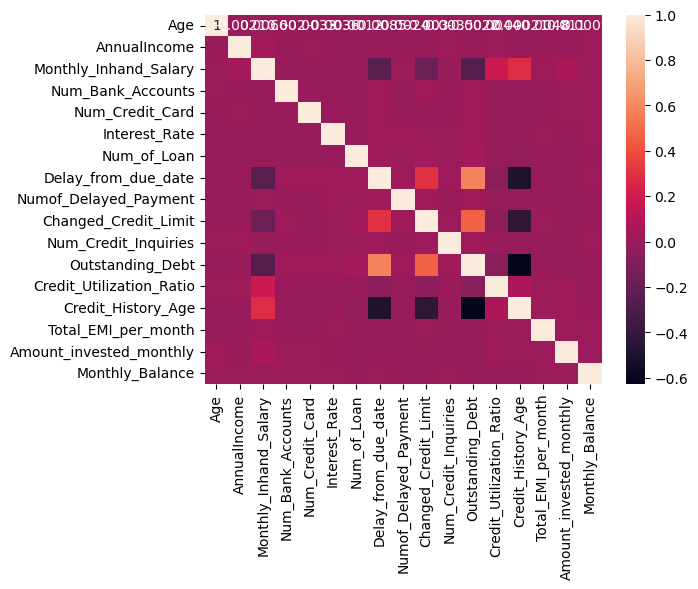

In [32]:
corrMatrix = train_df.corr()
sns.heatmap(corrMatrix, annot=True)
# plt.figure(figsize=(20, 100))
plt.show()

C:\Users\gustavo.o.gois\AppData\Local\Temp\ipykernel_9424\1156404166.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  selected_col = selected_col.corr()


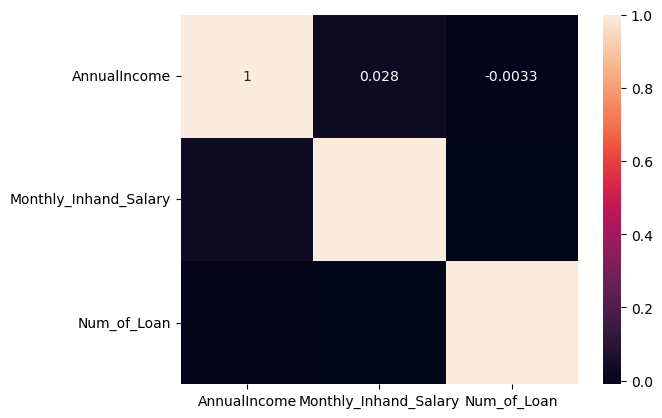

In [33]:
selected_col = train_df.loc[:, ["AnnualIncome", "Monthly_Inhand_Salary", "Num_of_Loan", "Credit_Score"]]
selected_col = selected_col.corr()
sns.heatmap(selected_col, annot=True)
# plt.figure(figsize=(20, 100))
plt.show()

In [34]:
train_df.groupby(by=["Credit_Score"]).agg({"Age": "mean"})

,Age
Credit_Score,
Good,123.711339
Poor,109.601122
Standard,111.044821
